<a href="https://colab.research.google.com/github/joaramirezra/ClasificadorHojasCanabis/blob/master/PresentacionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador hojas de canabis con anomalias 
### Febrero 2020
**Autores:**
- Johan Ramirez 
- Adriana Rivera

In [0]:
# Importacion de librerias
import cv2                                                
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees

# Data set
---

In [0]:
url = 'https://raw.githubusercontent.com/joaramirezra/ClasificadorHojasCanabis/master/dataFrame.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,MoB,MoG,MoR,MeB,MeG,MeR,sdtB,stdG,stdR,MoB2,MoG2,MoR2,MeB2,MeG2,MeR2,sdtB2,stdG2,stdR2,hu1,hu2,hu3,hu4,hu5,hu6,hu7,Ncont,MinArea,MaxArea,ContConv,MinPer,MaxPeri,type,var2,var3,var
1,11.0,43.0,20.0,15.609935,52.551740,28.917639,10.831466,14.156018,14.660467,33.0,118.0,113.0,41.274806,119.203241,113.508758,13.545329,2.281940,4.057276,0.002036,3.896489e-07,1.975891e-09,4.603443e-10,-4.077933e-19,-2.314626e-13,1.626717e-19,10.0,1680.0,2.0,3.0,5.656854,25850.065742,1.0,NaN,NaN,NaN
2,15.0,71.0,34.0,20.313145,78.438995,42.608000,12.577629,15.735803,15.631453,53.0,112.0,102.0,61.086336,114.789580,104.991901,14.730575,2.744397,5.078848,0.001945,1.618989e-07,2.300864e-09,5.549067e-10,-6.699813e-20,-1.354644e-13,6.234216e-19,20.0,2416.0,0.5,4.0,5.656854,34499.553223,1.0,NaN,NaN,NaN
3,11.0,57.0,30.0,16.117764,64.699430,36.972668,11.728563,15.078706,14.882422,45.0,117.0,107.0,50.866312,118.067676,108.382202,14.151376,2.060985,5.023452,0.001890,6.381743e-09,8.479674e-11,2.963300e-10,4.674468e-20,1.526872e-14,-4.631061e-21,23.0,274292.5,12.0,4.0,39.071068,10050.748945,1.0,NaN,NaN,NaN
4,10.0,63.0,28.0,14.750944,70.362788,36.795557,11.723098,14.500892,14.698378,46.0,114.0,106.0,53.977381,115.734359,105.865197,13.826917,1.998463,4.404477,0.001506,1.328624e-07,5.506063e-10,7.395989e-11,-6.774615e-21,1.351797e-14,1.329890e-20,6.0,1632.5,2.0,0.0,232.769552,22558.653270,1.0,NaN,NaN,NaN
5,7.0,48.0,22.0,12.920143,52.927004,28.622405,10.598902,13.783048,13.041982,36.0,118.0,113.0,41.089956,119.117967,112.100539,12.874814,1.799715,3.689180,0.001690,5.297218e-11,4.785277e-10,7.139692e-11,1.124058e-20,5.192093e-16,-6.914346e-21,2.0,1564.5,1141.0,0.0,21270.147797,24815.062434,1.0,NaN,NaN,NaN


# Limpieza de datos
---


In [0]:
subset = df[['MoB', 'MoG','MoR', 'MeB','MeG', 'MeR','sdtB',
           'stdG','stdR','MoB2', 'MoG2','MoR2', 'MeB2','MeG2',
           'MeR2','sdtB2', 'stdG2','stdR2','hu1','hu2','hu3',
           'hu4','hu5','hu6','hu7','Ncont','MinArea','MaxArea',
           'ContConv','MinPer','MaxPeri','type']]

columns = subset.columns[1:]
plantas  = torch.tensor(subset.values).float()
data = plantas[:,:-1]
target = plantas[:,-1]
plantas.shape,data.shape,target.shape

# Normalizacion 
media = torch.mean(plantas,dim=0)
std_plantas = torch.std(plantas,dim=0)
norm = (plantas-media)/std_plantas

# Clases 
sanas = plantas[torch.eq(target,1)]
Enfermas = plantas[torch.eq(target,2)]
insectos = plantas[torch.eq(target,3)]
agua = plantas[torch.eq(target,4)]

# Media sanas 
mediaSanas = torch.mean(sanas,dim=0)
mediaEnfermas = torch.mean(Enfermas,dim=0)
mediaInsectos = torch.mean(insectos,dim=0)
mediaAgua = torch.mean(agua,dim=0)

for i,args in enumerate(zip(columns,mediaSanas,mediaEnfermas,mediaInsectos,mediaAgua)):
   print('{:13} {:6.2f} {:6.2f} {:6.2f} {:6.2f}'.format(*args))

# 
subset.describe()

MoG            12.60  10.12  11.10  18.32
MoR            60.00  65.90 105.29 122.84
MeB            30.57  36.61  86.84 121.68
MeG            17.01  14.45  15.85  24.70
MeR            64.91  72.02 108.51 120.27
sdtB           36.80  43.73  94.53 119.08
stdG           11.14  10.75  10.47  10.52
stdR           13.49  15.16  18.91  18.49
MoB2           13.39  15.23  23.08  18.86
MoG2           45.38  51.14  88.94 108.58
MoR2          116.57 116.86 126.18 128.63
MeB2          108.23 104.29  84.69  70.21
MeG2           51.04  56.99  93.77 109.03
MeR2          117.84 118.53 128.55 128.45
sdtB2         108.80 103.99  84.03  73.67
stdG2          12.79  14.16  18.40  17.13
stdR2           2.13   2.61   4.56   2.46
hu1             3.86   5.05   8.54   7.48
hu2             0.00   0.00   0.01   0.42
hu3             0.00   0.00   0.00   3.30
hu4             0.00   0.00   0.00   2.59
hu5             0.00   0.00   0.00   2.59
hu6            -0.00   0.00   0.00 127.14
hu7            -0.00  -0.00   0.00

,MoB,MoG,MoR,MeB,MeG,MeR,sdtB,stdG,stdR,MoB2,MoG2,MoR2,MeB2,MeG2,MeR2,sdtB2,stdG2,stdR2,hu1,hu2,hu3,hu4,hu5,hu6,hu7,Ncont,MinArea,MaxArea,ContConv,MinPer,MaxPeri,type
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,165.000000,1.650000e+02,1.650000e+02,165.000000,165.000000,165.000000,165.000000
mean,12.030303,82.412121,59.539394,16.760717,86.348822,65.465013,10.765120,16.173956,17.448927,67.278788,120.896970,95.684848,72.169971,122.441475,95.954557,15.369364,3.032220,6.021145,0.052007,3.800585e-01,2.982120e-01,2.980006e-01,1.464046e+01,2.358007e+00,-2.579923e-05,38.327273,1.258483e+05,1.195581e+04,5.800000,422.104690,16421.099890,2.230303
std,6.824833,32.334944,40.609457,6.740984,28.981889,37.635030,1.889528,4.670652,5.765203,30.984573,12.746891,17.231142,28.319941,12.308482,16.401741,4.250612,1.414993,2.725225,0.616324,4.879485e+00,3.827665e+00,3.825808e+00,1.880601e+02,3.028886e+01,3.495939e-04,51.825712,3.268474e+05,1.520194e+05,9.966529,2404.655302,11009.511185,1.009855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.588868e-12,-6.359238e-10,-4.483511e-03,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.000000,58.000000,31.000000,12.188511,64.699430,36.795557,9.924523,13.325458,13.439349,45.000000,117.000000,80.000000,50.424601,118.002361,82.641667,12.865814,2.135678,4.027784,0.001467,4.300455e-08,1.603907e-10,6.468463e-11,-1.188812e-20,-1.875287e-14,-1.991240e-20,10.000000,1.602500e+03,5.000000e-01,0.000000,2.000000,9417.126434,1.000000
50%,11.000000,72.000000,40.000000,15.837177,79.049198,49.333084,10.599354,15.078706,15.568320,56.000000,118.000000,102.000000,63.329661,119.407994,101.539740,14.471580,2.556336,5.079779,0.001666,1.259458e-07,4.809787e-10,1.458917e-10,5.266053e-23,-1.228866e-15,0.000000e+00,21.000000,3.143000e+03,1.000000e+00,2.000000,5.656854,15133.169423,2.000000
75%,15.000000,110.000000,92.000000,20.239477,109.684440,95.300364,11.739598,18.153356,21.417837,93.000000,123.000000,108.000000,93.053713,127.280944,108.382202,17.228101,3.394949,7.897794,0.001948,2.821938e-07,1.567987e-09,3.354739e-10,2.610459e-20,2.157137e-14,1.591389e-20,42.000000,2.464000e+04,5.500000e+00,6.000000,37.071068,23161.349133,3.000000
max,43.000000,174.000000,153.000000,42.708322,151.423060,154.927335,16.989564,40.629160,36.836544,139.000000,146.000000,123.000000,138.371274,143.972355,116.557379,36.055206,7.222220,16.184905,7.918111,6.267830e+01,4.916746e+01,4.914355e+01,2.415676e+03,3.890675e+02,2.266289e-04,334.000000,2.214424e+06,1.952830e+06,66.000000,21270.147797,55621.354942,4.000000


# Componentes Principales 

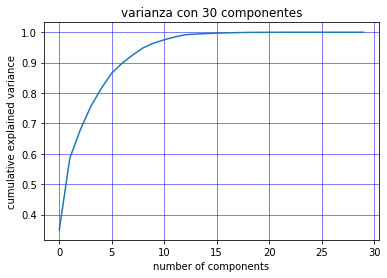

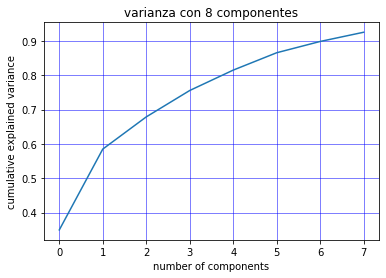

In [0]:
# Reduccion de dimension
scaler = StandardScaler()
X = scaler.fit_transform(plantas)
NumberComponents = 30 # Numero de componenete
pca = PCA(n_components=NumberComponents)
principal_components = pca.fit_transform(X)
new_data = pd.DataFrame(data = principal_components)

## ME falta agregar graficador 
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.title('varianza con 30 componentes', fontdict=None, loc='center')
plt.show()

scaler = StandardScaler()
X = scaler.fit_transform(plantas)
NumberComponents = 8 # Numero de componenete
pca = PCA(n_components=NumberComponents)
principal_components = pca.fit_transform(X)
new_data = pd.DataFrame(data = principal_components)
new_data.insert(8, 'type',target, True)
new_data.drop(29)

# Evaluacion cambio varianza con 12 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid(color='b', linestyle='-', linewidth=0.5)
plt.title('varianza con 8 componentes', fontdict=None, loc='center')
plt.show()

# Preparacion Data ( entrenamiento y testeo )
---

In [0]:
# Separo el 70 de los datos para entrenar y para Testear  
np.random.seed(23)
X_train, X_test, y_train, y_test =train_test_split(new_data, target, test_size = 0.30, random_state = 28)
print('el numero del set de entrenamiento es =',len(X_train) )
print('el numero del set de testeo es =',len(X_test) )

el numero del set de entrenamiento es = 115
el numero del set de testeo es = 50


# Evaluacion de clasificadores
---
### Random forest classifier

In [0]:
def imprimirResultados(clf,X_test,y_test,X_train,y_train):
  algoritmo = clf
  algoritmo.fit(X_train,y_train)
  algoritmo.predict(X_test)
  preds = algoritmo.predict(X_test)

  print('Score modelo : {}'.format(algoritmo.score(X_train,y_train)))
  plt.figure(1)
  plt.subplot(211)
  plt.hist([preds,y_test])
  plt.grid(color='b', linestyle='-', linewidth=0.5)
  plt.show()


Score modelo : 1.0


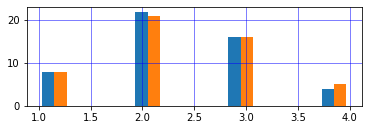

predicha,1.0,2.0,3.0,4.0
real,,,,
1.0,8,0,0,0
2.0,0,21,0,0
3.0,0,1,15,0
4.0,0,0,1,4


In [0]:
clf = RandomForestClassifier(n_jobs=1000, random_state=42)
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha']) 

Score modelo : 0.9987700680190621


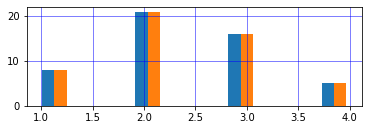

predicha,0.977,0.997,1.000,2.000,2.969,2.970,3.000,3.006,3.007,3.993,4.000
real,,,,,,,,,,,
1.0,1,3,4,0,0,0,0,0,0,0,0
2.0,0,0,0,21,0,0,0,0,0,0,0
3.0,0,0,0,0,1,1,12,1,1,0,0
4.0,0,0,0,0,0,0,0,0,0,2,3


In [0]:
clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha'])



### Regresion logistica

Score modelo : 0.9739130434782609


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


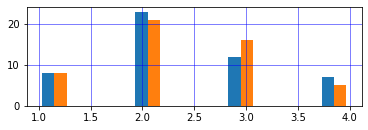

predicha,1.0,2.0,3.0,4.0
real,,,,
1.0,8,0,0,0
2.0,0,21,0,0
3.0,0,2,12,2
4.0,0,0,0,5


In [0]:
clf = LogisticRegression()
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha'])

 3 vecinos
Score modelo : 0.9478260869565217


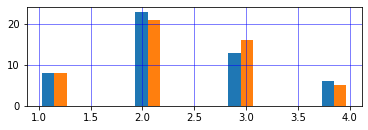

 4 vecinos
Score modelo : 0.9391304347826087


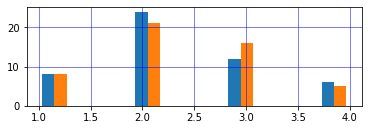

 5 vecinos
Score modelo : 0.9391304347826087


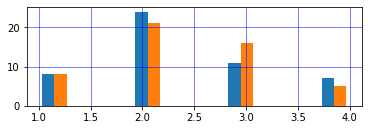

predicha,1.0,2.0,3.0,4.0
real,,,,
1.0,8,0,0,0
2.0,0,21,0,0
3.0,0,3,10,3
4.0,0,0,1,4


In [0]:
clf =  KNeighborsClassifier(n_neighbors=3)
print(" 3 vecinos")
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha'])
print(" 4 vecinos")
clf =  KNeighborsClassifier(n_neighbors=4)
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha'])
print(" 5 vecinos")
clf =  KNeighborsClassifier(n_neighbors=5)
imprimirResultados(clf,X_test,y_test,X_train,y_train)
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['real'], colnames=[' predicha'])


# Clasificador con redes Neuronales
---

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(8, input_dim=new_data.shape[1], activation='relu')) # Hidden 1
model.add(Dense(100, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 115 samples, validate on 50 samples
Epoch 1/1000
115/115 - 1s - loss: 4.2332 - val_loss: 4.1971
Epoch 2/1000
115/115 - 0s - loss: 3.4775 - val_loss: 3.6857
Epoch 3/1000
115/115 - 0s - loss: 2.7741 - val_loss: 3.3701
Epoch 4/1000
115/115 - 0s - loss: 2.2655 - val_loss: 3.2308
Epoch 5/1000
115/115 - 0s - loss: 1.8138 - val_loss: 3.2420
Epoch 6/1000
115/115 - 0s - loss: 1.4443 - val_loss: 3.3685
Epoch 7/1000
115/115 - 0s - loss: 1.1718 - val_loss: 3.5816
Epoch 8/1000
115/115 - 0s - loss: 0.9429 - val_loss: 3.8405
Epoch 9/1000
Restoring model weights from the end of the best epoch.
115/115 - 0s - loss: 0.7836 - val_loss: 4.1101
Epoch 00009: early stopping
Final score (MSE): 3.2308030128479004


Final score (RMSE): 1.7974435091018677


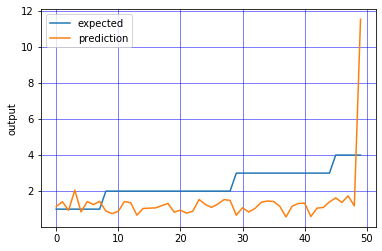

In [0]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.grid(color='b', linestyle='-', linewidth=0.5)
    plt.show()
chart_regression(pred.flatten(),y_test)

# DEMO
---


In [0]:
# Subo Foto 
# se guarda la imagen
from google.colab import files
uploaded = files.upload()

Saving S21.jpg to S21.jpg


In [0]:
# img = cv2.imread('CAN1.jpeg',1)
# img = cv2.imread('S20.jpg',1)
#  img = cv2.imread('I30413.jpg',1)
# img = cv2.imread('A2.jpeg',1)

plt.imshow(img)
plt.show()
caracteristicas = ExtracionDeCarateristicas(img).reshape(1,-1)
clasificador(caracteristicas)

In [0]:

def clasificador(caracteristicas):
  scaler = StandardScaler()
  X = scaler.fit_transform(plantas)
  NumberComponents = 9 # Numero de componenete
  pca = PCA(n_components=NumberComponents)
  principal_components = pca.fit_transform(X)
  C = pca.transform(caracteristicas.T)
  k = C[9].reshape(-1,1)
  k = k.T

  clf =  clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
  clf.fit(X_train,y_train)
  preds = clf.predict(k)
  preds = 3.45
  print('la hoja es de tipo: {}'.format(preds))
  # from tensorflow.keras.models import Sequential
  # from tensorflow.keras.layers import Dense, Activation
  # from tensorflow.keras.callbacks import EarlyStopping

  # # Build the0- neural network
  # model = Sequential()
  # model.add(Den0se(8, input_dim=new_data.shape[1], activation='relu')) # Hidden 1
  # model.add(Dense(5, activation='relu')) # Hidden 2
  # model.add(Dense(1)) # Output
  # model.compile(loss='mean_squared_error', optimizer='adam')
  # monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
  #                         patience=5, verbose=1, mode='auto', restore_best_weights=True)
  # model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

  # from sklearn import metrics

  # # Predict
  # mb = model.predict(k)
  # print("El tipo es ",np.mean(mb ))
  # print(mb)
  # # Measure MSE error.  
  # # print("Final score (MSE): {}".format(score))


In [0]:
def ExtracionDeCarateristicas(img):
  imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
  Gausianas = cv2.GaussianBlur(cv2.cvtColor(imgYCC, cv2.COLOR_BGR2GRAY),(5,5),0)
  ret,umbralizada = cv2.threshold(Gausianas,120,255,cv2.THRESH_BINARY_INV)
  Enmascarada = cv2.bitwise_and(img,img, mask = umbralizada)
  # Se comienza sacar carateristicas 

  caracteristicas = np.array([])
    # ----------------------------------- Canal RGB -------------------------------------------------
  for i, col in enumerate(['B', 'G', 'R']):
      hist = cv2.calcHist([img], [i], umbralizada, [255], [1, 255])
      caracteristicas = np.append(caracteristicas, np.argmax(hist))
  # Ademas del calculo del histograma se optiene la media y desviacion estandar del canal     
  mean, sdk = cv2.meanStdDev(img,mask = umbralizada)
  caracteristicas = np.append(caracteristicas,mean)
  caracteristicas = np.append(caracteristicas,sdk)
    
  # ----------------------------------- Canal YCBYR -----------------------------------------------
  # Extraccion canal YCBYR moda media y desviacion estandar
  for i, col in enumerate(['Y', 'B', 'R']):
      hist = cv2.calcHist([imgYCC], [i], umbralizada, [256], [1, 255])
      caracteristicas = np.append(caracteristicas, np.argmax(hist))   
      

  # Ademas del calculo del histograma se optiene la media y desviacion estandar del canal     
  mean, sdk = cv2.meanStdDev(imgYCC,mask = umbralizada)
  caracteristicas = np.append(caracteristicas,mean)
  caracteristicas = np.append(caracteristicas,sdk)

  # ---------------------------------- Momentos de  HU-------------------------------------------    
  # se calculan los momentos de Hu 
  moments = cv2.moments(umbralizada)
  huMoments = cv2.HuMoments(moments)
  caracteristicas = np.append(caracteristicas,huMoments)

  image = img
  bordes = [40]
  contornos = [40]
  kernel = np.ones((10,10),np.uint8)

  erosion = cv2.erode(umbralizada,kernel,iterations = 1)
  dilation = cv2.dilate(erosion,kernel,iterations = 1)
  canny = cv2.Canny(dilation,0,300)
  # bordes.append(dilation)
  countorns,hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  caracteristicas = np.append(caracteristicas,np.shape(countorns)) # 26 numero de contornos

  # Extraccion de caracteristicas de contornos 
  cv2.drawContours(image, countorns, -1, (255,0,0), 15) # Esta linea es opcional 
  
  maxArea =0
  cont = 0
  maxArc = 0
  for i in range (0, len(countorns)):
          if (cv2.contourArea(countorns[i]) > maxArea ):
              maxArea = cv2.contourArea(countorns[i])
          if (cv2.arcLength(countorns[i],True)>maxArc):
              maxArc=cv2.arcLength(countorns[i],True)

  minArea = maxArea
  minArc = maxArc
  for i in range (0, len(countorns)):
          if (cv2.contourArea(countorns[i]) < minArea  and cv2.contourArea(countorns[i]) != 0):
              minArea = cv2.contourArea(countorns[i])
          if (cv2.arcLength(countorns[i],True) < minArc  and cv2.arcLength(countorns[i],True) != 0):
              minArc = cv2.arcLength(countorns[i],True);
          if (cv2.isContourConvex(countorns[i]) ):
              cont = cont + 1 

  caracteristicas = np.append(caracteristicas,maxArea)
  caracteristicas = np.append(caracteristicas,minArea)
  caracteristicas = np.append(caracteristicas,cont)
  caracteristicas = np.append(caracteristicas,minArc)
  caracteristicas = np.append(caracteristicas,maxArc)
  return caracteristicas